In [2]:
import numpy as np
import mlgrad.models as models
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
from mlgrad.utils import exclude_outliers

import mlgrad.regr as regr

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/animals.csv", sep=',')
df

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
5,Dipliodocus,11700.000,50.0
6,Asian elephant,2547.000,4603.0
7,Donkey,187.100,419.0
8,Horse,521.000,655.0
9,Potar monkey,10.000,115.0


In [4]:
X = df["body"].values
Y = df["brain"].values

X = np.log(X)
Y = np.log(Y)
Xs = X[:,None]

X0 = np.linspace(X.min(), X.max(), 20)

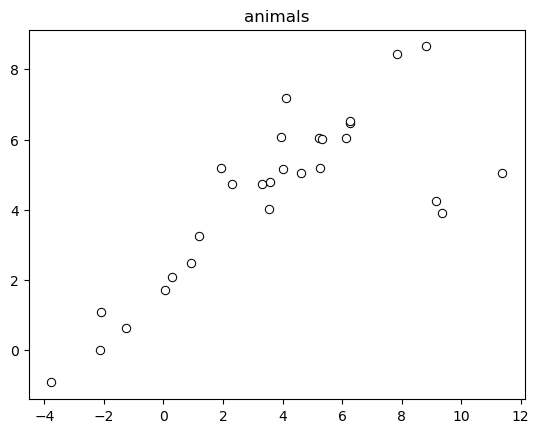

In [8]:
plt.title('animals')
plt.xlabel('log.body')
plt.ylabel('log.brain')
plt.scatter(X, Y, s=36, c='w', edgecolors='k', linewidths=0.75)
plt.show()

In [4]:
loss_func_sq = loss.ErrorLoss(funcs.Square())
# loss_func_rsq = loss.RelativeErrorLoss(funcs.Square())
loss_func_sqrt = loss.ErrorLoss(funcs.Sqrt())

In [5]:
# sqr_norm = funcs2.SquareNorm()

In [6]:
mod_ls = models.LinearModel(1)
mod_r_irls = models.LinearModel(1)
mod_m_irls = models.LinearModel(1)
mod_wm_irls = models.LinearModel(1)

K=578 param=[2.554 0.496]


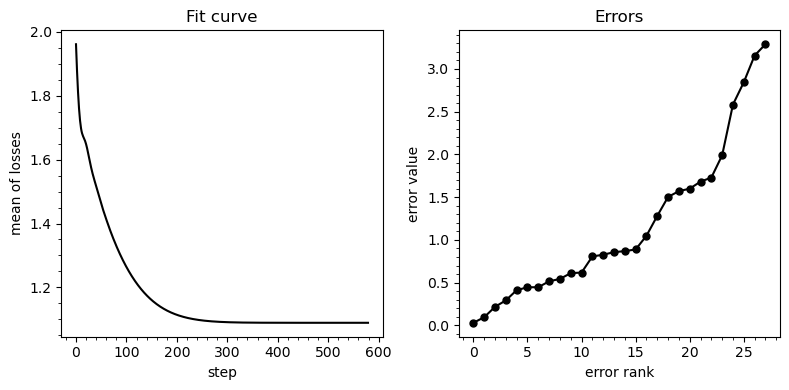

In [7]:
regr_ls = regr.regression(Xs, Y, mod_ls, n_iter=5000, h=0.01, verbose=1)
err_ls = regr.plot_losses_and_errors(regr_ls, Xs, Y)

0.9783271636423944
K=12 param=[1.877 0.740]


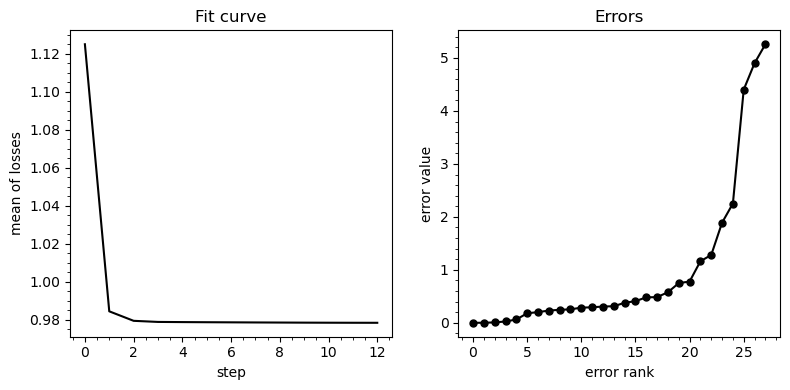

In [8]:
regr_r_irls = regr.r_regression_irls(Xs, Y, mod_r_irls, rho_func=funcs.Sqrt(0.001), verbose=1)
regr.plot_losses_and_errors(regr_r_irls, Xs, Y)

0.06957317330461162


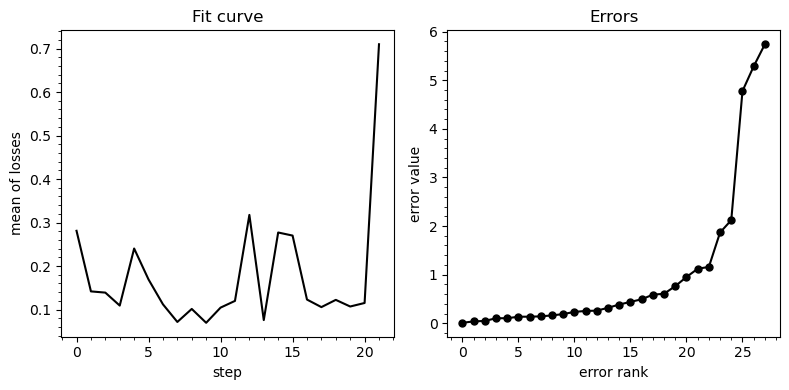

In [9]:
avg_m_irls = regr.averaging_function('M', rhofunc=funcs.Sqrt(0.001))
regr_m_irls = regr.m_regression_irls(Xs, Y, mod_m_irls, agg_func=avg_m_irls, h=0.01, )
regr.plot_losses_and_errors(regr_m_irls, Xs, Y)

0.19936061004550917


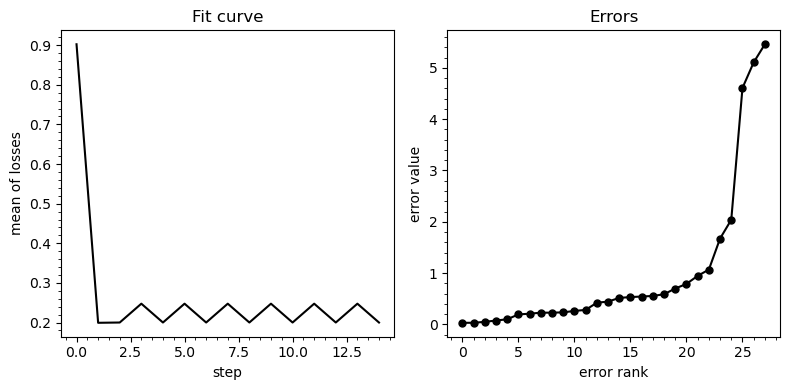

In [10]:
alpha = (len(Y)-5)/len(Y)
avg_wm_irls = regr.averaging_function('WM', rhofunc=funcs.QuantileFunc(alpha, funcs.Sqrt(0.001)))
regr_wm_irls = regr.m_regression_irls(Xs, Y, mod_wm_irls, agg_func=avg_wm_irls, h=0.01, )
regr.plot_losses_and_errors(regr_wm_irls, Xs, Y)

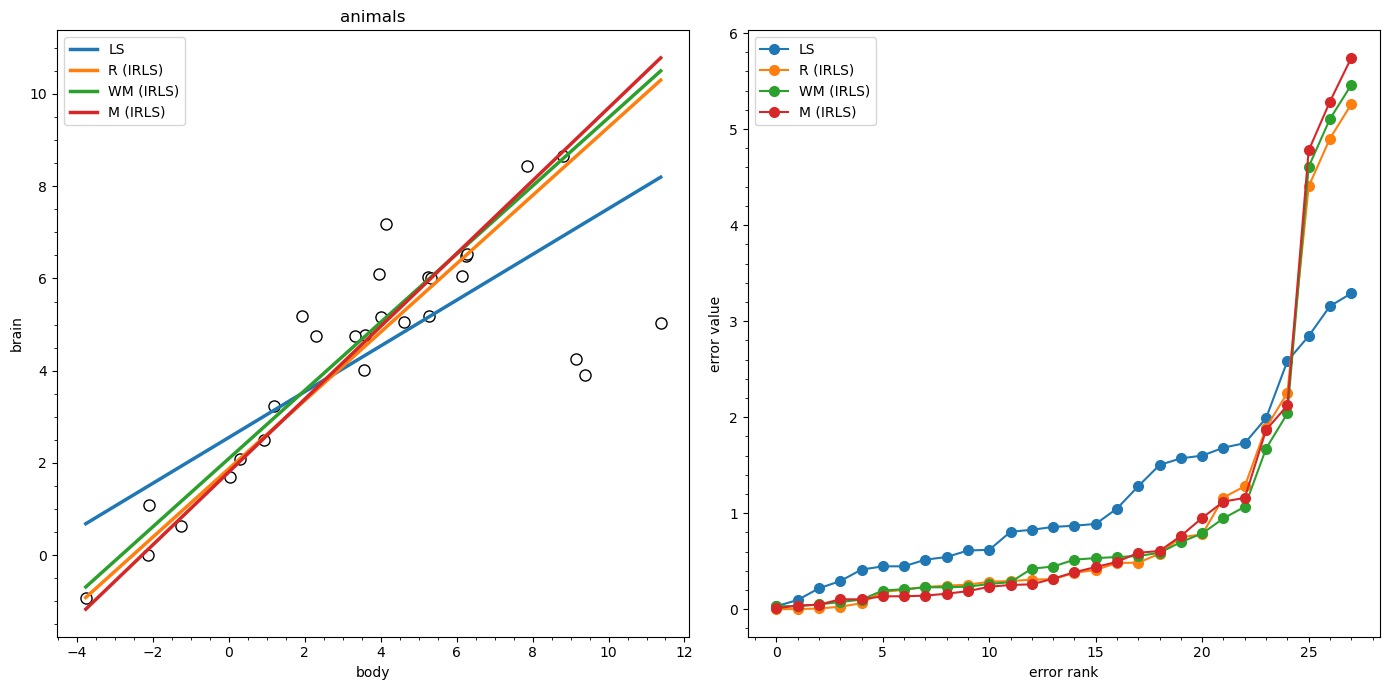

In [16]:
plt.figure(figsize=(14.0, 7.0))
plt.subplot(1,2,1)
plt.title('animals')
plt.scatter(X, Y, s=64, c='w', edgecolors='k', linewidths=1.0)
plt.plot(X0, mod_ls.evaluate_all(X0.reshape(-1,1)), linewidth=2.5, label=r'LS')
plt.plot(X0, mod_r_irls.evaluate_all(X0.reshape(-1,1)), linewidth=2.5, label=r'R (IRLS)')
plt.plot(X0, mod_wm_irls.evaluate_all(X0.reshape(-1,1)), linewidth=2.5, label=r'WM (IRLS)')
# plt.plot(X0, mod_wm_ls.evaluate_all(X0.reshape(-1,1)), linewidth=2.5, label=r'WM (LS)')
plt.plot(X0, mod_m_irls.evaluate_all(X0.reshape(-1,1)), linewidth=2.5, label=r'M (IRLS)')
plt.minorticks_on()
# plt.grid(1)
plt.xlabel('log.body')
plt.ylabel('log.brain')
plt.legend(loc='best')
plt.subplot(1,2,2)
plt.plot(sorted(np.abs(Y - mod_ls.evaluate_all(Xs))), marker='o', markersize=7, label=r'LS')
plt.plot(sorted(np.abs(Y - mod_r_irls.evaluate_all(Xs))), marker='o', markersize=7, label=r'R (IRLS)')
plt.plot(sorted(np.abs(Y - mod_wm_irls.evaluate_all(Xs))), marker='o', markersize=7, label=r'WM (IRLS)')
# plt.plot(sorted(np.abs(Y - mod_wm_ls.evaluate_all(Xs))), marker='o', markersize=7, label=r'WM (LS)')
plt.plot(sorted(np.abs(Y - mod_m_irls.evaluate_all(Xs))), marker='o', markersize=7, label=r'M (IRLS)')
plt.minorticks_on()
# plt.grid(1)
plt.ylabel('error value')
plt.xlabel('error rank')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

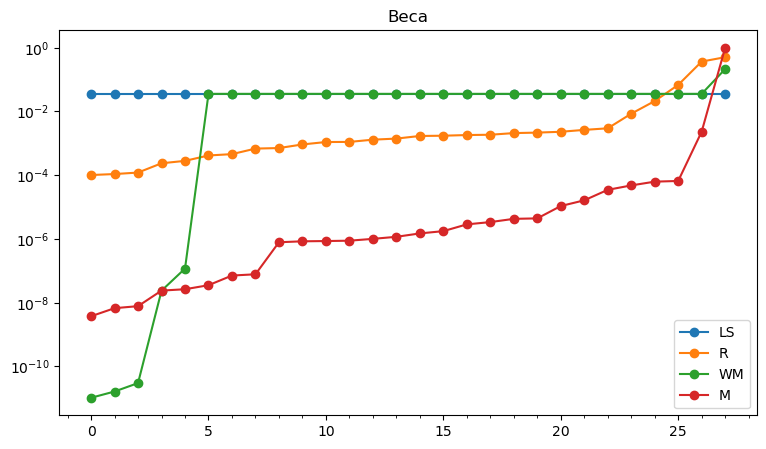

In [14]:
plt.figure(figsize=(9,5))
plt.title("Веса")
regr.plot_sample_weights(regr_ls, 'LS')
regr.plot_sample_weights(regr_r_irls, 'R')
regr.plot_sample_weights(regr_wm_irls, 'WM')
regr.plot_sample_weights(regr_m_irls, 'M')
plt.minorticks_on()
plt.gca().set_yscale('log')
plt.legend()
plt.show()